# Data Science: Second Partial Exam
## Arturo Fornés Arvayo A01227071

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
import seaborn as sns

In [4]:
training = pd.read_csv("expedia-hotel-recommendations/train.csv", nrows=100000)

## Exploratory Data Analysis

In [5]:
training.shape

(100000, 24)

In [6]:
training.head()

date_time  site_name  posa_continent  user_location_country  \
0  2014-08-11 07:46:59          2               3                     66   
1  2014-08-11 08:22:12          2               3                     66   
2  2014-08-11 08:24:33          2               3                     66   
3  2014-08-09 18:05:16          2               3                     66   
4  2014-08-09 18:08:18          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   348               48862                  2234.2641   
2                   348               48862                  2234.2641   
3                   442               35390                   913.1932   
4                   442               35390                   913.6259   

   user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt  \
0       12          0           1  ...                  0           1   
1       12          0           1  ...                  0           1   
2       12          0           0  ...                  0           1   
3       93          0           0  ...                  0           1   
4       93          0           0  ...                  0           1   

  srch_destination_id  srch_destination_type_id  is_booking  cnt  \
0                8250                         1           0    3   
1                8250                         1           1    1   
2                8250                         1           0    1   
3               14984                         1           0    1   
4               14984                         1           0    1   

   hotel_continent  hotel_country  hotel_market  hotel_cluster  
0                2             50           628              1  
1                2             50           628              1  
2                2             50           628              1  
3                2             50          1457             80  
4                2             50          1457             21  

[5 rows x 24 columns]

In [7]:
training.describe()

site_name  posa_continent  user_location_country  \
count  100000.00000   100000.000000          100000.000000   
mean        9.10014        2.637850              84.531040   
std        12.09091        0.751001              54.320574   
min         2.00000        0.000000               0.000000   
25%         2.00000        3.000000              66.000000   
50%         2.00000        3.000000              66.000000   
75%        11.00000        3.000000              69.000000   
max        53.00000        4.000000             239.000000   

       user_location_region  user_location_city  orig_destination_distance  \
count         100000.000000       100000.000000               63078.000000   
mean             311.630930        28465.223540                1897.609161   
std              209.399151        16822.922817                2123.885180   
min                0.000000            3.000000                   0.005600   
25%              174.000000        13914.000000                 290.528875   
50%              311.000000        27733.000000                1093.888450   
75%              385.000000        43113.000000                2518.177400   
max             1025.000000        56495.000000               11641.224200   

             user_id      is_mobile     is_package        channel  ...  \
count  100000.000000  100000.000000  100000.000000  100000.000000  ...   
mean   195700.878390       0.138030       0.260470       5.760540  ...   
std    110173.879786       0.344933       0.438893       3.771156  ...   
min        12.000000       0.000000       0.000000       0.000000  ...   
25%    107548.000000       0.000000       0.000000       2.000000  ...   
50%    181983.000000       0.000000       0.000000       9.000000  ...   
75%    301357.000000       0.000000       1.000000       9.000000  ...   
max    391007.000000       1.000000       1.000000      10.000000  ...   

       srch_children_cnt    srch_rm_cnt  srch_destination_id  \
count      100000.000000  100000.000000        100000.000000   
mean            0.325160       1.112700         14511.034340   
std             0.722341       0.441928         11043.082364   
min             0.000000       0.000000             8.000000   
25%             0.000000       1.000000          8267.000000   
50%             0.000000       1.000000         11271.000000   
75%             0.000000       1.000000         18881.000000   
max             9.000000       8.000000         65035.000000   

       srch_destination_type_id    is_booking            cnt  hotel_continent  \
count             100000.000000  100000.00000  100000.000000    100000.000000   
mean                   2.590540       0.08270       1.477770         3.206530   
std                    2.160456       0.27543       1.197163         1.624119   
min                    1.000000       0.00000       1.000000         0.000000   
25%                    1.000000       0.00000       1.000000         2.000000   
50%                    1.000000       0.00000       1.000000         2.000000   
75%                    5.000000       0.00000       2.000000         4.000000   
max                    9.000000       1.00000      59.000000         6.000000   

       hotel_country   hotel_market  hotel_cluster  
count  100000.000000  100000.000000   100000.00000  
mean       80.972620     597.559610       49.74576  
std        55.679861     507.624672       28.95063  
min         0.000000       0.000000        0.00000  
25%        50.000000     160.000000       25.00000  
50%        50.000000     585.000000       49.00000  
75%       106.000000     701.000000       73.00000  
max       212.000000    2117.000000       99.00000  

[8 rows x 21 columns]

In [8]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
date_time                    100000 non-null object
site_name                    100000 non-null int64
posa_continent               100000 non-null int64
user_location_country        100000 non-null int64
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    63078 non-null float64
user_id                      100000 non-null int64
is_mobile                    100000 non-null int64
is_package                   100000 non-null int64
channel                      100000 non-null int64
srch_ci                      99929 non-null object
srch_co                      99929 non-null object
srch_adults_cnt              100000 non-null int64
srch_children_cnt            100000 non-null int64
srch_rm_cnt                  100000 non-null int64
srch_destination_id          100000 non-null int64
srch_destination_type

In [9]:
y = training["hotel_cluster"]
y.shape
y.head()

0     1
1     1
2     1
3    80
4    21
Name: hotel_cluster, dtype: int64

In [10]:
x = training.drop("hotel_cluster", axis=1)
x.shape
x.head()

date_time  site_name  posa_continent  user_location_country  \
0  2014-08-11 07:46:59          2               3                     66   
1  2014-08-11 08:22:12          2               3                     66   
2  2014-08-11 08:24:33          2               3                     66   
3  2014-08-09 18:05:16          2               3                     66   
4  2014-08-09 18:08:18          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   348               48862                  2234.2641   
2                   348               48862                  2234.2641   
3                   442               35390                   913.1932   
4                   442               35390                   913.6259   

   user_id  is_mobile  is_package  ...  srch_adults_cnt srch_children_cnt  \
0       12          0           1  ...                2                 0   
1       12          0           1  ...                2                 0   
2       12          0           0  ...                2                 0   
3       93          0           0  ...                2                 0   
4       93          0           0  ...                2                 0   

  srch_rm_cnt  srch_destination_id  srch_destination_type_id  is_booking  cnt  \
0           1                 8250                         1           0    3   
1           1                 8250                         1           1    1   
2           1                 8250                         1           0    1   
3           1                14984                         1           0    1   
4           1                14984                         1           0    1   

   hotel_continent  hotel_country  hotel_market  
0                2             50           628  
1                2             50           628  
2                2             50           628  
3                2             50          1457  
4                2             50          1457  

[5 rows x 23 columns]

In [11]:
# Ignore datetime values.
x_clean = x.drop(["date_time", "srch_ci", "srch_co"], axis=1)
# Find out what columns have null (NaN) values.
x_clean.isnull().sum()

site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36922
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
dtype: int64

In [12]:
# Find out information about the column with NaN values.
x_clean['orig_destination_distance'].describe()

count    63078.000000
mean      1897.609161
std       2123.885180
min          0.005600
25%        290.528875
50%       1093.888450
75%       2518.177400
max      11641.224200
Name: orig_destination_distance, dtype: float64

In [13]:
# Fill NaN values with the mean.
x_clean['orig_destination_distance'].fillna(x_clean['orig_destination_distance'].describe().mean(), inplace=True)
x_clean['orig_destination_distance'].isnull().sum()

0

In [14]:
x_clean['orig_destination_distance'].describe()

count    100000.000000
mean       5011.169681
std        4405.373859
min           0.005600
25%         725.696800
50%        3236.788400
75%       10330.414858
max       11641.224200
Name: orig_destination_distance, dtype: float64

In [15]:
x_clean.shape

(100000, 20)

In [16]:
regressor_OLS = sm.OLS(endog=y.values, exog=x_clean.values).fit()

In [17]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 1.415e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:47:13   Log-Likelihood:            -4.8001e+05
No. Observations:              100000   AIC:                         9.601e+05
Df Residuals:                   99980   BIC:                         9.603e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3381      0.011     30.169      0.000       0.316       0.360
x2             9.9311      0.129     76.925      0.000       9.678      10.184
x3            -0.0252      0.002    -13.705      0.000      -0.029      -0.022
x4             0.0048      0.000     10.132      0.000       0.004       0.006
x5          5.971e-05    5.5e-06     10.847      0.000    4.89e-05    7.05e-05
x6             0.0004   2.49e-05     16.303      0.000       0.000       0.000
x7          1.267e-05   8.21e-07     15.427      0.000    1.11e-05    1.43e-05
x8             0.2406      0.271      0.889      0.374      -0.290       0.771
x9             4.7157      0.223     21.137      0.000       4.278       5.153
x10            0.1503      0.025      6.067      0.000       0.102       0.199
x11            1.4397      0.122     11.764      0.000       1.200       1.680
x12            0.7177      0.130      5.509      0.000       0.462       0.973
x13            2.1298      0.244      8.742      0.000       1.652       2.607
x14         7.147e-05   9.41e-06      7.595      0.000     5.3e-05    8.99e-05
x15           -0.0326      0.049     -0.671      0.502      -0.128       0.063
x16           -0.9307      0.341     -2.727      0.006      -1.600      -0.262
x17            0.4017      0.078      5.134      0.000       0.248       0.555
x18            1.0694      0.063     17.073      0.000       0.947       1.192
x19           -0.0053      0.002     -2.861      0.004      -0.009      -0.002
x20            0.0036      0.000     19.645      0.000       0.003       0.004
==============================================================================
Omnibus:                    27994.034   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4474.639
Skew:                           0.020   Prob(JB):                         0.00
Kurtosis:                       1.964   Cond. No.                     8.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# x8 and x15 translates to indexes 7 and 14
x_clean.iloc[:,7].describe()

count    100000.000000
mean          0.138030
std           0.344933
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_mobile, dtype: float64

In [19]:
x_clean.iloc[:, 14].describe()

count    100000.000000
mean          2.590540
std           2.160456
min           1.000000
25%           1.000000
50%           1.000000
75%           5.000000
max           9.000000
Name: srch_destination_type_id, dtype: float64

In [20]:
indices = [x for x in list(range(20)) if x not in [7, 14]]
x_super_clean = x_clean.iloc[:, indices]

In [21]:
x_super_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
site_name                    100000 non-null int64
posa_continent               100000 non-null int64
user_location_country        100000 non-null int64
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    100000 non-null float64
user_id                      100000 non-null int64
is_package                   100000 non-null int64
channel                      100000 non-null int64
srch_adults_cnt              100000 non-null int64
srch_children_cnt            100000 non-null int64
srch_rm_cnt                  100000 non-null int64
srch_destination_id          100000 non-null int64
is_booking                   100000 non-null int64
cnt                          100000 non-null int64
hotel_continent              100000 non-null int64
hotel_country                100000 non-null int64
hotel_market         

In [22]:
regressor_OLS = sm.OLS(endog=y.values, exog=x_super_clean.values).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 1.573e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:47:23   Log-Likelihood:            -4.8001e+05
No. Observations:              100000   AIC:                         9.601e+05
Df Residuals:                   99982   BIC:                         9.602e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3378      0.011     30.195      0.000       0.316       0.360
x2             9.9263      0.127     77.914      0.000       9.677      10.176
x3            -0.0252      0.002    -13.704      0.000      -0.029      -0.022
x4             0.0048      0.000     10.135      0.000       0.004       0.006
x5          5.956e-05    5.5e-06     10.823      0.000    4.88e-05    7.03e-05
x6             0.0004   2.48e-05     16.345      0.000       0.000       0.000
x7          1.268e-05   8.21e-07     15.435      0.000    1.11e-05    1.43e-05
x8             4.7536      0.220     21.629      0.000       4.323       5.184
x9             0.1493      0.025      6.030      0.000       0.101       0.198
x10            1.4453      0.122     11.820      0.000       1.206       1.685
x11            0.7211      0.130      5.537      0.000       0.466       0.976
x12            2.1170      0.243      8.701      0.000       1.640       2.594
x13         6.871e-05   8.49e-06      8.096      0.000    5.21e-05    8.53e-05
x14           -0.9454      0.341     -2.772      0.006      -1.614      -0.277
x15            0.4006      0.078      5.121      0.000       0.247       0.554
x16            1.0696      0.063     17.084      0.000       0.947       1.192
x17           -0.0052      0.002     -2.847      0.004      -0.009      -0.002
x18            0.0036      0.000     19.647      0.000       0.003       0.004
==============================================================================
Omnibus:                    27989.088   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4474.336
Skew:                           0.020   Prob(JB):                         0.00
Kurtosis:                       1.964   Cond. No.                     8.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
DF = pd.DataFrame(data=x_super_clean.copy())
DF["y"] = y

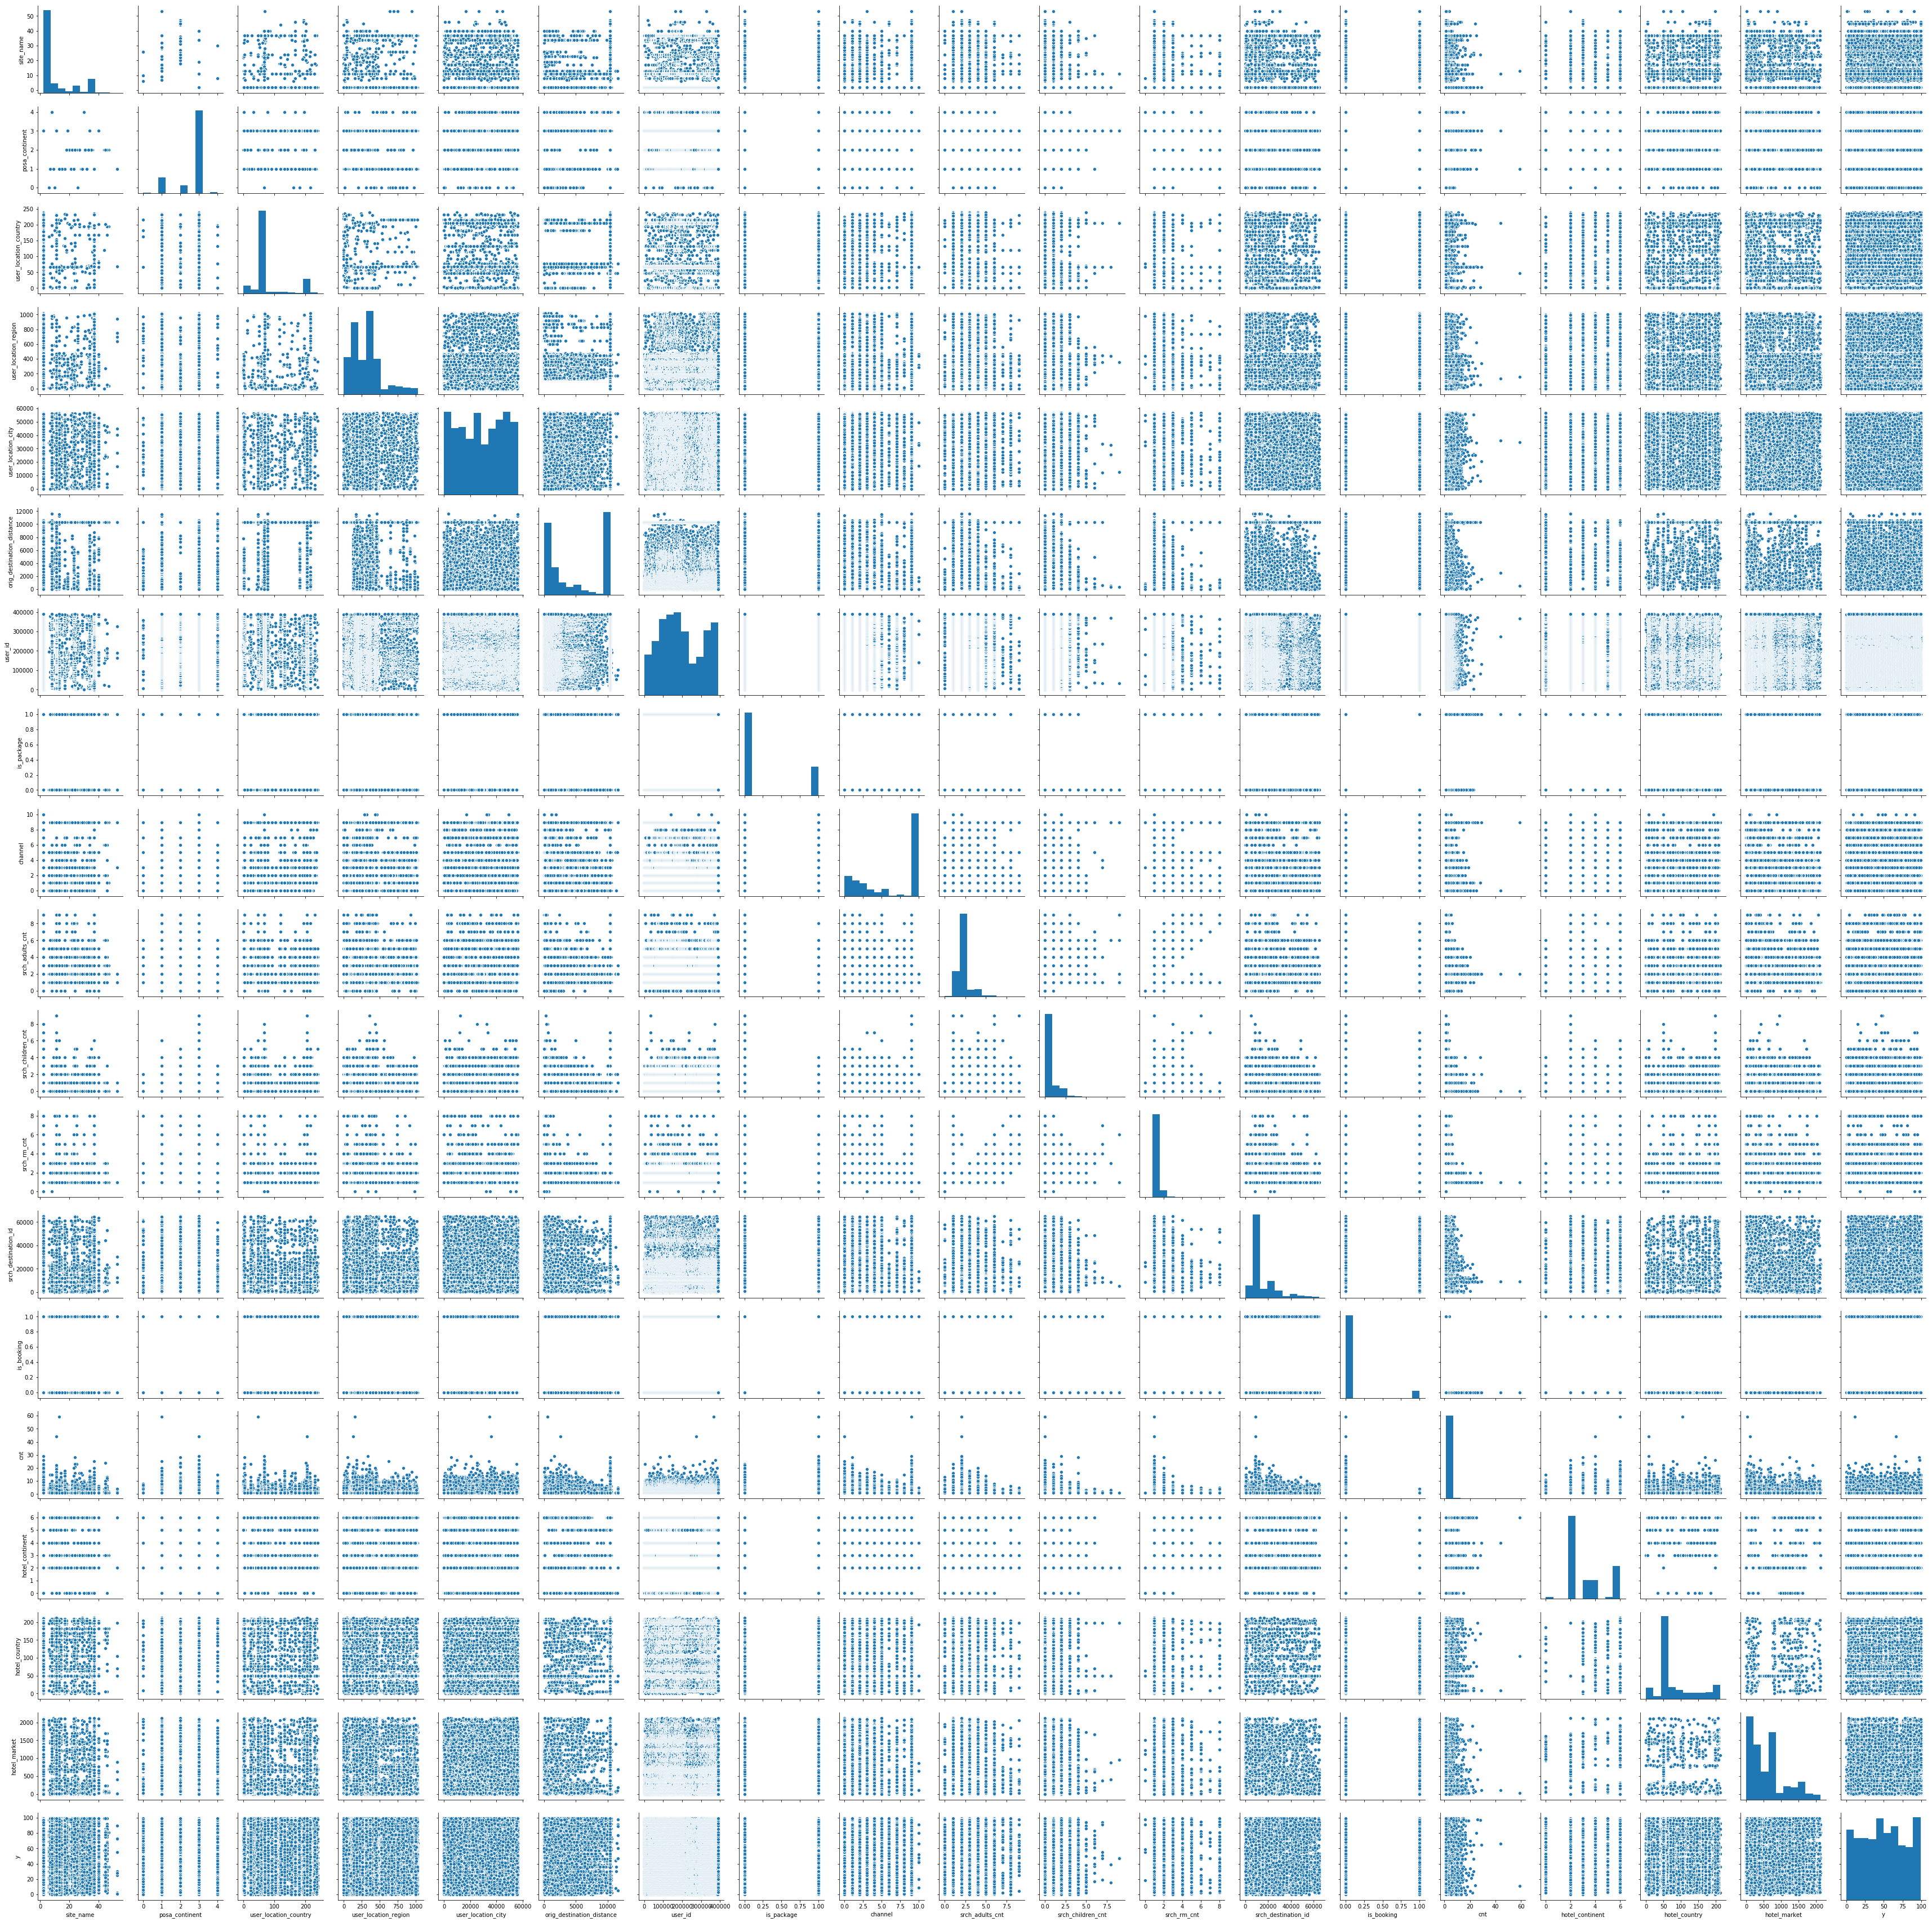

In [24]:
sns.pairplot(DF)

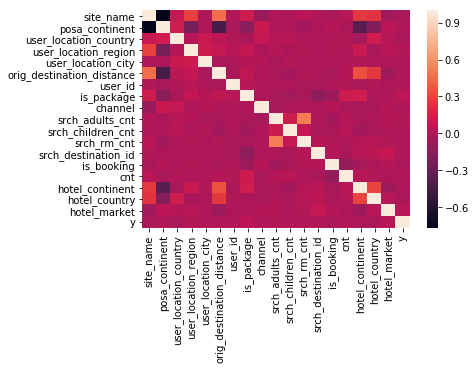

In [25]:
sns.heatmap(DF.corr())

## ML

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel

### Dataset splitting

In [54]:
x_super_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
site_name                    100000 non-null int64
posa_continent               100000 non-null int64
user_location_country        100000 non-null int64
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    100000 non-null float64
user_id                      100000 non-null int64
is_package                   100000 non-null int64
channel                      100000 non-null int64
srch_adults_cnt              100000 non-null int64
srch_children_cnt            100000 non-null int64
srch_rm_cnt                  100000 non-null int64
srch_destination_id          100000 non-null int64
is_booking                   100000 non-null int64
cnt                          100000 non-null int64
hotel_continent              100000 non-null int64
hotel_country                100000 non-null int64
hotel_market         

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_super_clean.drop(["user_id", "cnt", "is_booking"], axis=1), y, test_size=0.2)

### Random Forest

In [71]:
rforest_classifier = RandomForestClassifier(n_estimators=100)

In [72]:
rforest_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
r_forest_predictions = rforest_classifier.predict(x_test)

#### Metrics

In [74]:
print("Mean absolute error: %.2f"% mean_absolute_error(y_test, r_forest_predictions))
print("Mean squared error: %.2f"% mean_squared_error(y_test, r_forest_predictions))
print('Variance score: %.2f' % r2_score(y_test, r_forest_predictions))
print("Accuracy: ", rforest_classifier.score(x_test, y_test))
print(classification_report(y_test, r_forest_predictions))

Mean absolute error: 21.05
Mean squared error: 1046.23
Variance score: -0.24
Accuracy:  0.3701
              precision    recall  f1-score   support

           0       0.36      0.38      0.37       186
           1       0.61      0.64      0.63       233
           2       0.41      0.40      0.41       239
           3       0.35      0.32      0.34       124
           4       0.35      0.34      0.34       190
           5       0.29      0.28      0.29       288
           6       0.33      0.33      0.33       213
           7       0.43      0.36      0.39       146
           8       0.44      0.43      0.44       214
           9       0.39      0.38      0.39       275
          10       0.39      0.37      0.38       247
          11       0.31      0.26      0.28       199
          12       0.36      0.38      0.37       142
          13       0.37      0.45      0.40       165
          14       0.30      0.22      0.25       130
          15       0.37      0.35      0

#### Confussion Matrix

[[ 71   0   0 ...   0   2   1]
 [  0 150   0 ...   0   0   0]
 [  1   0  95 ...   2   4   2]
 ...
 [  3   0   4 ... 100   7   2]
 [  1   0  10 ...  10 121   1]
 [  1   0   1 ...   5   3  60]]


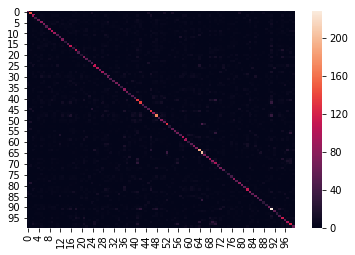

In [75]:
print(confusion_matrix(y_test, r_forest_predictions))
sns.heatmap(confusion_matrix(y_test, r_forest_predictions))

### KNN

In [76]:
knn_classifier = KNeighborsClassifier(n_neighbors=int(np.sqrt(100000)))

In [77]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=316, p=2,
           weights='uniform')

In [78]:
knn_predictions = knn_classifier.predict(x_test)

#### Metrics

In [79]:
print("Mean absolute error: %.2f"% mean_absolute_error(y_test, knn_predictions))
print("Mean squared error: %.2f"% mean_squared_error(y_test, knn_predictions))
print('Variance score: %.2f' % r2_score(y_test, knn_predictions))
print("Accuracy: ", knn_classifier.score(x_test, y_test))
print(classification_report(y_test, knn_predictions))

Mean absolute error: 32.94
Mean squared error: 1696.59
Variance score: -1.01
Accuracy:  0.06205
              precision    recall  f1-score   support

           0       0.08      0.06      0.07       186
           1       0.06      0.21      0.09       233
           2       0.07      0.06      0.06       239
           3       0.00      0.00      0.00       124
           4       0.00      0.00      0.00       190
           5       0.03      0.02      0.02       288
           6       0.08      0.00      0.01       213
           7       0.14      0.01      0.01       146
           8       0.07      0.11      0.08       214
           9       0.06      0.06      0.06       275
          10       0.08      0.05      0.06       247
          11       0.06      0.03      0.04       199
          12       0.09      0.16      0.12       142
          13       0.03      0.02      0.02       165
          14       0.00      0.00      0.00       130
          15       0.00      0.00      

/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Confussion Matrix

[[ 71   0   0 ...   0   2   1]
 [  0 150   0 ...   0   0   0]
 [  1   0  95 ...   2   4   2]
 ...
 [  3   0   4 ... 100   7   2]
 [  1   0  10 ...  10 121   1]
 [  1   0   1 ...   5   3  60]]


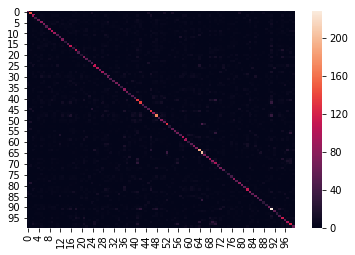

In [80]:
print(confusion_matrix(y_test, r_forest_predictions))
sns.heatmap(confusion_matrix(y_test, r_forest_predictions))

### Feature Selection with Random Forest

In [100]:
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100))
selector.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [104]:
selector_support = selector.get_support()
print(selector_support)
selected_features = x_train.columns[selector_support]
print(len(selected_features))
print(selected_features)
x_selected = x_super_clean[selected_features]
x_selected.info()

[False False False  True  True  True False  True False False False  True
 False False  True]
6
Index(['user_location_region', 'user_location_city',
       'orig_destination_distance', 'channel', 'srch_destination_id',
       'hotel_market'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    100000 non-null float64
channel                      100000 non-null int64
srch_destination_id          100000 non-null int64
hotel_market                 100000 non-null int64
dtypes: float64(1), int64(5)
memory usage: 4.6 MB


In [105]:
xs_train, xs_test, ys_train, ys_test = train_test_split(x_selected, y, test_size=0.2)

In [113]:
rforest_classifier_s = RandomForestClassifier(n_estimators=100)
rforest_classifier_s.fit(xs_train, ys_train)
r_forest_predictions_s = rforest_classifier_s.predict(xs_test)

In [114]:
print("Mean absolute error: %.2f"% mean_absolute_error(ys_test, r_forest_predictions_s))
print("Mean squared error: %.2f"% mean_squared_error(ys_test, r_forest_predictions_s))
print('Variance score: %.2f' % r2_score(ys_test, r_forest_predictions_s))
print("Accuracy: ", rforest_classifier_s.score(xs_test, ys_test))
print(classification_report(ys_test, r_forest_predictions_s))

Mean absolute error: 20.53
Mean squared error: 1018.77
Variance score: -0.22
Accuracy:  0.38495
              precision    recall  f1-score   support

           0       0.38      0.42      0.40       191
           1       0.63      0.66      0.65       217
           2       0.41      0.43      0.42       230
           3       0.35      0.29      0.32       119
           4       0.37      0.34      0.35       187
           5       0.29      0.30      0.30       309
           6       0.41      0.35      0.38       229
           7       0.33      0.37      0.35       132
           8       0.41      0.48      0.44       183
           9       0.40      0.41      0.40       260
          10       0.36      0.40      0.38       214
          11       0.25      0.29      0.27       168
          12       0.31      0.38      0.34       128
          13       0.44      0.42      0.43       166
          14       0.15      0.12      0.14       104
          15       0.38      0.31      

### Test

In [84]:
test = pd.read_csv("expedia-hotel-recommendations/test.csv", nrows=100000)
test_clean = test.drop(["id", "date_time", "srch_ci", "srch_co", "is_mobile", "srch_destination_type_id"], axis=1)
test_clean.isnull().sum()

site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    33619
user_id                          0
is_package                       0
channel                          0
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
dtype: int64

In [85]:
test_clean['orig_destination_distance'].fillna(test_clean['orig_destination_distance'].describe().mean(), inplace=True)

In [86]:
rforest_classifier_test = RandomForestClassifier(n_estimators=10)
rforest_classifier_test.fit(x_super_clean.drop(["cnt", "is_booking"], axis=1), y)
test_predictions = rforest_classifier_test.predict(test_clean)

In [87]:
test_predictions

array([86, 43, 77, ...,  1, 15,  2])

### Conclusions

In this problems I tested a total of three models using K-Nearest Neighbors, Random Forest and Support Vector Machine. K-Nearest Neighbors underperformed and Support Vector Machine couldn't compute the predictions in a reasonable time-frame so it was removed.

Previously, I performed the EDA of the dataset, found and filled NA values with the mean for that column in the dataset, seeing as it was a non-categorical numeric field, and removed any columns that didn't seem important for the result based on the importance of the parameters.

After measuring the performance of both models I attempted to improve the accuracy of the Random Forest model by previously feature selecting with the same model, but the score earned only a 1 percentile in accuracy.

Based on the six features selected through feature selection using Random Forest: 
* user_location_region
* user_location_city
* orig_destination_distance
* channel
* srch_destination_id
* hotel_market

The feature that can mostly be changed by expedia is the marketing channel, so focusing on that could be beneficial to the company.